In [1]:
# this is the only line you need to change
# to build a custom image classification model for any dataset

num_classes = 5
class_labels = ['burger', 'cake', 'juice', 'noodles', 'pizza']


In [ ]:
!unzip train.zip

In [3]:
# load images from directory

from keras.utils import image_dataset_from_directory

train_data, valid_data = image_dataset_from_directory(
    directory='train', labels='inferred', class_names=class_labels,
    subset='both', validation_split=0.3,
    image_size=(224, 224), batch_size=64, seed=1555)

Found 1454 files belonging to 5 classes.
Using 1018 files for training.
Using 436 files for validation.


In [4]:
# load pre-trained model

from keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# freeze layers of base model

for layer in base_model.layers:
  layer.trainable = False

In [6]:
# customize model by adding output layers

import keras
from keras import layers

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=(['accuracy']))

In [8]:
model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 250s 15s/step - accuracy: 0.6506 - loss: 0.9659 - val_accuracy: 0.9541 - val_loss: 0.1379
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 256s 16s/step - accuracy: 0.9786 - loss: 0.0950 - val_accuracy: 0.9862 - val_loss: 0.0713
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 244s 15s/step - accuracy: 0.9941 - loss: 0.0297 - val_accuracy: 0.9862 - val_loss: 0.0504
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 270s 16s/step - accuracy: 0.9996 - loss: 0.0201 - val_accuracy: 0.9862 - val_loss: 0.0462
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 239s 15s/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 0.9817 - val_loss: 0.0548


In [ ]:
# make sure to upload at least 20 test samples

!unzip test.zip

In [13]:
# load sample images to test model output

import numpy as np
from keras.utils import load_img

test_sample = []
n = 25

for k in range(n):
    img_file = 'test/' + str(k+1) + ".jpg"
    test_img = load_img(img_file, target_size=(224, 224))
    test_sample.append(test_img)

np.array(test_sample).shape

(25, 224, 224, 3)

In [16]:
# run predictions

y = model.predict(np.array(test_sample))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


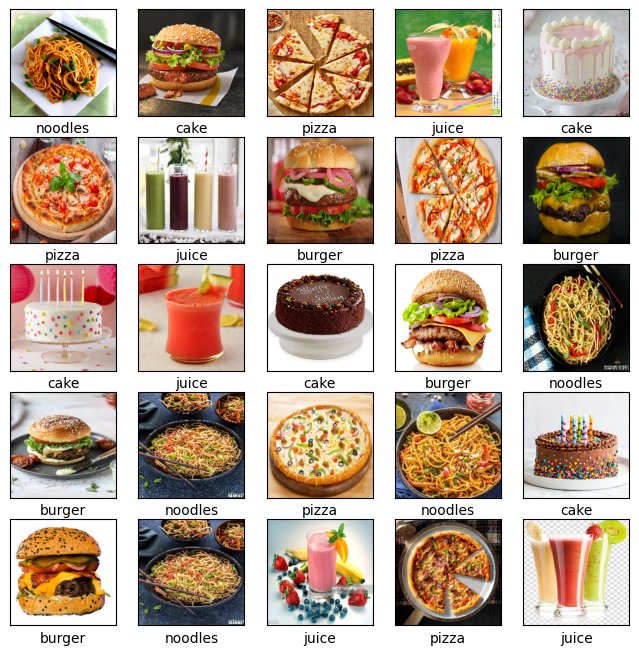

In [17]:
# plot model output predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

for k in range(n):
  plt.subplot(5, 5, k+1)
  plt.imshow(test_sample[k])

  plt.xlabel(class_labels[np.argmax(y[k])])
  plt.xticks([])
  plt.yticks([])